In [23]:
%pylab inline
import numpy as np
import nibabel as nib
from dipy.reconst.dti import TensorModel, fractional_anisotropy, quantize_evecs, color_fa
from dipy.reconst.csdeconv import ConstrainedSphericalDeconvModel, auto_response
from dipy.data import get_sphere, get_data
from dipy.direction import peaks_from_model
from dipy.io import read_bvals_bvecs
from dipy.core.gradients import gradient_table



Populating the interactive namespace from numpy and matplotlib


In [24]:
def normalize_bvecs(bvecs):
    for i, k in zip(bvecs, range(len(bvecs))):
        norm = np.linalg.norm(i)
        if norm != 1.0 and norm != 0.0:
            bvecs[k, :] = np.divide(bvecs[k, :], norm)

In [25]:
def dti2fa(fdwi, ften, outfile=None):
    '''
    fdwi: .nii.gz 
    ften: .npz file with tensors
    outfile: name of output file. default is none (named based on input dti file)
    '''
    
    
    
    with np.load(ften) as data:
        tensor_fit = data['arr_0']
        tensor_fit = tensor_fit.tolist()
        
    FA = fractional_anisotropy(tensor_fit.evals)
    # get rid of NaNs
    FA[np.isnan(FA)] = 0
    # generate and save the black and white FA map
    if (outfile == None):
        outfile = ften.split(".")[0]
    fa_img = nib.Nifti1Image(FA.astype(np.float32), img.affine)
    nib.save(fa_img, outfile + 'tensor_fa.nii.gz')
    # generate the RGB FA map
    FA = np.clip(FA, 0, 1)
    RGB = color_fa(FA, tensor_fit.evecs)
    # save the RGB FA map
    nib.save(nib.Nifti1Image(np.array(255 * RGB, 'uint8'), img.affine), outfile + 'tensor_rgb.nii.gz')


# Interacting with the figures

In [66]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

In [69]:
def view_tensors(f, z):
    img = nib.load(f)
    data = img.get_data()
    imshow(data[:,:,z], cmap='Greys_r')
    

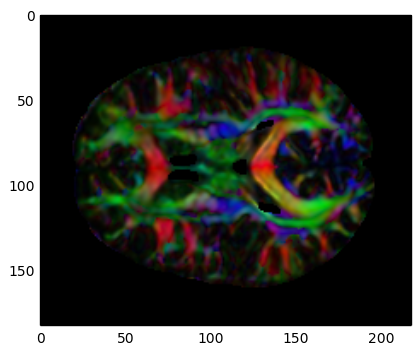

In [71]:
# 'KKI2009_113_1_tensor_fa.nii.gz'

interact(view_tensors, f='KKI2009_113_1_tensor_rgb.nii.gz', z=widgets.IntSlider(min=0,max=181,step=1,value=85));

In [16]:
fdwi

'KKI2009_113_1_DTI_aligned.nii.gz'

In [17]:
splitext(fdwi)

('KKI2009_113_1_DTI_aligned.nii', '.gz')

In [18]:
fdwi

'KKI2009_113_1_DTI_aligned.nii.gz'

In [ ]:
# fdwi.split(".")[0]

In [50]:
kk1_113 = np.load('tensors/KKI2009_113_2_DTI_tensors.npz')